# Working with data 2017. Class 8
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 1. Clustering
## 2. Data imputation
## 3. Dimensionality reduction

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy.stats

import statsmodels.formula.api as smf

# 1. Clustering

In [34]:
from sklearn import preprocessing

from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans

In [58]:
df = pd.read_csv("data/big3_position.csv",sep="\t").dropna()
df["Revenue"] = np.log10(df["Revenue"])
df["Assets"] = np.log10(df["Assets"])
df["Employees"] = np.log10(df["Employees"])
df["MarketCap"] = np.log10(df["MarketCap"])
df = df.replace([np.inf,-np.inf],np.nan).dropna().sample(300)
df.head(2)

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
3130,"APPLIED OPTOELECTRONICS, INC.",US760533927,9.76,2,5.278532,5.436918,3.400192,5.240180,NASDAQ National Market,Industrial company
755,MONOTYPE IMAGING HOLDINGS INC.,US203289482,19.78,1,5.284248,5.593050,2.693727,5.982111,NASDAQ National Market,Industrial company


In [60]:
X = df.loc[:,["Revenue","Assets","Employees","MarketCap"]]
X = preprocessing.scale(X)
print(X.sum(0))
print(X.std(0))
X

[ -1.11910481e-13   1.85934601e-13   2.19824159e-14   2.79554158e-13]
[ 1.  1.  1.  1.]


array([[-0.36876713, -0.68220535,  0.26763352, -0.80639115],
       [-0.36325862, -0.49958626, -0.50401999,  0.04420174],
       [-0.59109167,  0.53105902, -0.3752977 , -0.48330142],
       ..., 
       [ 0.51807468, -0.21091708,  0.77356348,  0.14753705],
       [ 1.07606207,  1.14466777,  0.6561359 ,  1.11508633],
       [ 0.85340652,  0.21902024,  1.55356623,  0.58284111]])

# 1a. Clustering with K-means 
- k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
- Other methods: http://scikit-learn.org/stable/modules/clustering.html


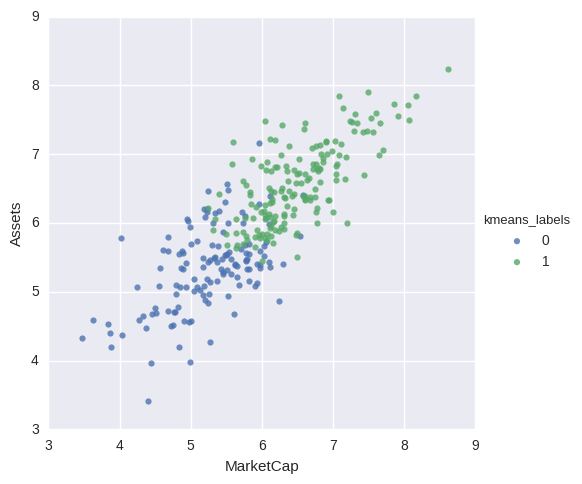

In [69]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
df["kmeans_labels"] = labels
sns.lmplot(x="MarketCap",y="Assets",hue="kmeans_labels",fit_reg=False,data=df)

# 1b. Clustering with DBSCAN
- The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as oppos

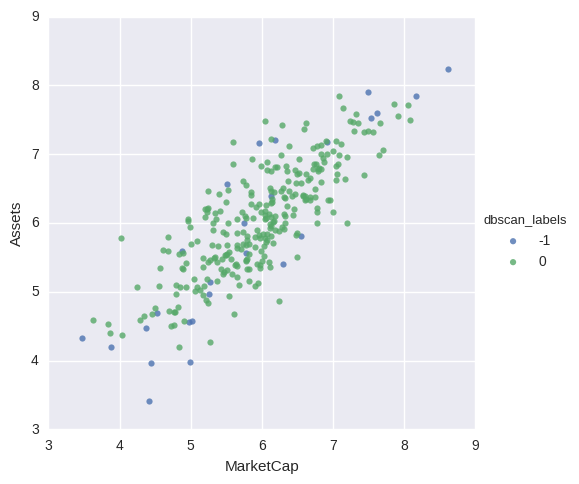

In [66]:
db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_
df["dbscan_labels"] = labels
sns.lmplot(x="MarketCap",y="Assets",hue="dbscan_labels",fit_reg=False,data=df)

In [70]:
Image(url="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png")

# 1c. Hierarchical clustering
- Keeps aggreagating from a point

[[   0.          150.3373409   120.10595294  155.10171976]
 [ 150.3373409     0.          193.3547258   140.18218283]
 [ 120.10595294  193.3547258     0.          190.80318619]
 [ 155.10171976  140.18218283  190.80318619    0.        ]]


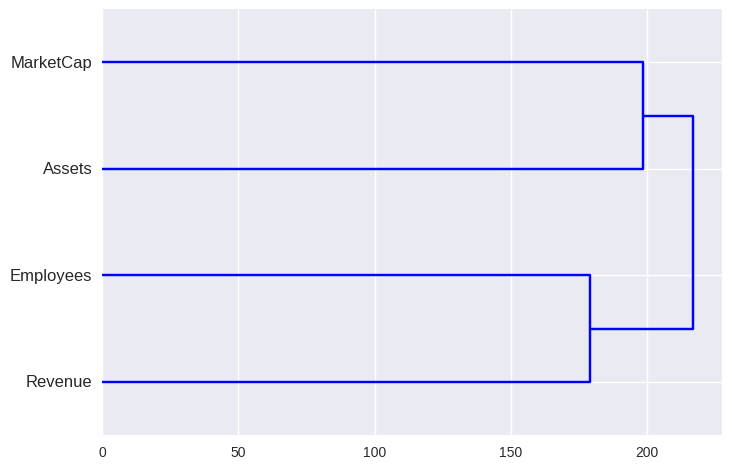

In [78]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate distance matrix
D = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        D[i,j] = np.sum(np.abs(X[:,i]-X[:,j]))
print(D)
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right',labels=["Revenue","Assets","Employees","MarketCap"])


# 2. Imputation of missing data (fancy)

In [ ]:
#Required libraries
!conda install tensorflow -y
!pip install fancyimpute
!pip install pydot_ng

In [88]:
df = pd.read_csv("data/big3_position.csv",sep="\t")
df["Revenue"] = np.log10(df["Revenue"])
df["Assets"] = np.log10(df["Assets"])
df["Employees"] = np.log10(df["Employees"])
df["MarketCap"] = np.log10(df["MarketCap"])
df = df.replace([np.inf,-np.inf],np.nan).sample(300)
df.head(2)

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
799,"ENPHASE ENERGY, INC.",US204645388,6.08,7,5.552971,5.218871,2.734800,4.993564,NASDAQ National Market,Industrial company
2557,SUMMIT FINANCIAL GROUP INC,US550672148,0.94,12,4.795880,NaN,2.243038,5.285607,NASDAQ National Market,Bank


In [99]:
X = df.loc[:,["Revenue","Assets","Employees","MarketCap"]].values
X

array([[ 5.55297102,  5.21887147,  2.73479983,  4.99356408],
       [ 4.79588002,         nan,  2.24303805,  5.28560681],
       [ 5.83306547,  6.08985144,  2.9790929 ,  5.47015313],
       ..., 
       [ 4.38435341,  4.35077118,  1.77815125,  4.19044376],
       [ 7.03566223,  7.04210052,  4.84509804,  6.99476692],
       [ 4.65783001,  5.30570812,         nan,  3.75404239]])

In [ ]:
df.describe()

In [100]:
from fancyimpute import KNN

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 10 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=10).complete(X)
df.loc[:,cols] = X_filled_knn

df.describe()

ImportError: /home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/_CVXcanon.cpython-35m-x86_64-linux-gnu.so: undefined symbol: _ZNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEED1Ev